In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
import pickle

'''
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:,.5f}'.format)
'''

c:\Users\lesmo\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


"\npd.set_option('display.max_rows', 500)\npd.set_option('display.max_columns', 500)\npd.set_option('display.width', 1000)\npd.set_option('display.float_format', '{:,.5f}'.format)\n"

# Facilities EDA

In [5]:
df5s = pickle.load(open("../data/facilities_wide.pkl", "rb"))
df5s=df5s.replace(r'^\s*$', np.nan, regex=True)
print(df5s.shape)
df5s.head()

(307, 55)


,hotel_name_,all_facilities,unlist,facilities_count,in_top_facilities,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,...,hairdryer,slippers,key access,accessible parking,facilities for disabled guests,wardrobe or closet,clothes rack,socket near the bed,bar,ironing service
0,RedDoorz near East Avenue Medical Center,"[[Toilet paper, Towels, Towels/Sheets (extra f...","[toilet paper, towels, towels/sheets (extra fe...",22,"[toilet paper, towels, toilet, free toiletries...",1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Skylab Guesthouse,"[[Toilet paper, Towels, Additional bathroom, B...","[toilet paper, towels, additional bathroom, bi...",97,"[toilet paper, towels, bidet, slippers, toilet...",1,1,1,0,0,...,1,1,1,0,0,0,0,1,0,1
2,The Excelsior Hotel Las Piñas,"[[Toilet paper, Towels, Bidet, Guest bathroom,...","[toilet paper, towels, bidet, guest bathroom, ...",97,"[toilet paper, towels, bidet, slippers, privat...",1,1,1,1,1,...,1,1,0,1,0,1,1,1,1,0
3,Rothman Hotel,"[[Private Bathroom, Toilet, Free toiletries, S...","[private bathroom, toilet, free toiletries, sh...",38,"[private bathroom, toilet, free toiletries, sh...",1,1,0,1,1,...,0,0,0,0,1,0,0,0,1,1
4,OYO 772 Remedios Apartment,"[[TV], [Daily housekeeping, Concierge], [Fire ...","[tv, daily housekeeping, concierge, fire extin...",11,"[tv, daily housekeeping, concierge, fire extin...",1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:

df5s = df5s.drop(['all_facilities', 'unlist', 'in_top_facilities'], axis=1)
df5s

,hotel_name_,facilities_count,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,smoke alarms,toilet,tv,...,hairdryer,slippers,key access,accessible parking,facilities for disabled guests,wardrobe or closet,clothes rack,socket near the bed,bar,ironing service
0,RedDoorz near East Avenue Medical Center,22,1,1,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,Skylab Guesthouse,97,1,1,1,0,0,0,1,0,...,1,1,1,0,0,0,0,1,0,1
2,The Excelsior Hotel Las Piñas,97,1,1,1,1,1,1,1,1,...,1,1,0,1,0,1,1,1,1,0
3,Rothman Hotel,38,1,1,0,1,1,0,1,1,...,0,0,0,0,1,0,0,0,1,1
4,OYO 772 Remedios Apartment,11,1,1,1,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,RedDoorz at EDSA Pasay,18,1,0,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
303,Kabayan Hotel Pasay,47,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,1,0,0,0
304,"Crimson Hotel Filinvest City, Manila",56,1,1,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
305,RedDoorz @ Jardin LRT Tayuman Manila,14,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [177]:
df5s.iloc[0][1:].sum()

18

In [178]:
df5s['no_of_facilities'] = df5s.sum(axis = 1)

In [180]:
df5s.sort_values(by=['no_of_facilities'], inplace=True, ascending=True)
df5s

,hotel_name_,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,smoke alarms,toilet,tv,24-hour security,...,slippers,key access,accessible parking,facilities for disabled guests,wardrobe or closet,clothes rack,socket near the bed,bar,ironing service,no_of_facilities
46,Ranchotel Alabang,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
149,OYO 841 Metro Deluxe Residences,0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5
101,OYO 474 Urbandeca Tower 316 - Nizami Condotel,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
21,RedDoorz @ University Belt Manila,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
20,OYO 790 Mango Inn,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Grand Hyatt Manila,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,47
186,Herald Suites - Multiple Use Hotel,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,48
248,"Shangri-La The Fort, Manila",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,48
237,Novotel Manila Araneta City Hotel - Multiple U...,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,48


In [181]:
df5s['no_of_facilities']

46      3
149     5
101     6
21      6
20      6
       ..
175    47
186    48
248    48
237    48
266    50
Name: no_of_facilities, Length: 307, dtype: int64

In [3]:
df = pickle.load(open("../data/merged_hotel_data.pkl", "rb"))
df=df.replace(r'^\s*$', np.nan, regex=True)
print(df.shape)
df

(76536, 94)


,hotel_name_,stars,location,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,...,nearest_resto,nearest_train,nearest_ocean,nearest_other,number_close,nearest_other_2km,zip_code,city,latitude,longitude
0,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0.10,12.00,12.0,0.90,21,3,1100,Quezon City,14.650991,121.048615
1,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0.10,12.00,12.0,0.90,21,3,1100,Quezon City,14.650991,121.048615
2,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0.10,12.00,12.0,0.90,21,3,1100,Quezon City,14.650991,121.048615
3,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0.10,12.00,12.0,0.90,21,3,1100,Quezon City,14.650991,121.048615
4,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0.10,12.00,12.0,0.90,21,3,1100,Quezon City,14.650991,121.048615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76531,88 Courtyard Hotel,3,"24 Roxas Boulevard, corner Cuneta Avenue, Pasa...",7.5,You're eligible for a Genius discount at 88 Co...,"[Airport Shuttle, Non Smoking Rooms, Room-serv...",173,"[8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.4', 'Facilities': '7.4', 'Cleanli...",...,0.05,0.85,16.0,0.95,21,2,1300,Pasay,14.543700,120.994650
76532,88 Courtyard Hotel,3,"24 Roxas Boulevard, corner Cuneta Avenue, Pasa...",7.5,You're eligible for a Genius discount at 88 Co...,"[Airport Shuttle, Non Smoking Rooms, Room-serv...",173,"[8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.4', 'Facilities': '7.4', 'Cleanli...",...,0.05,0.85,16.0,0.95,21,2,1300,Pasay,14.543700,120.994650
76533,88 Courtyard Hotel,3,"24 Roxas Boulevard, corner Cuneta Avenue, Pasa...",7.5,You're eligible for a Genius discount at 88 Co...,"[Airport Shuttle, Non Smoking Rooms, Room-serv...",173,"[8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.4', 'Facilities': '7.4', 'Cleanli...",...,0.05,0.85,16.0,0.95,21,2,1300,Pasay,14.543700,120.994650
76534,88 Courtyard Hotel,3,"24 Roxas Boulevard, corner Cuneta Avenue, Pasa...",7.5,You're eligible for a Genius discount at 88 Co...,"[Airport Shuttle, Non Smoking Rooms, Room-serv...",173,"[8.4, 7.4, 7.7, 7.8, 7.5, 8.1, 5.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.4', 'Facilities': '7.4', 'Cleanli...",...,0.05,0.85,16.0,0.95,21,2,1300,Pasay,14.543700,120.994650


# Facilities EDA

### Hotel Perspective

<AxesSubplot: xlabel='no_of_facilities', ylabel='Density'>

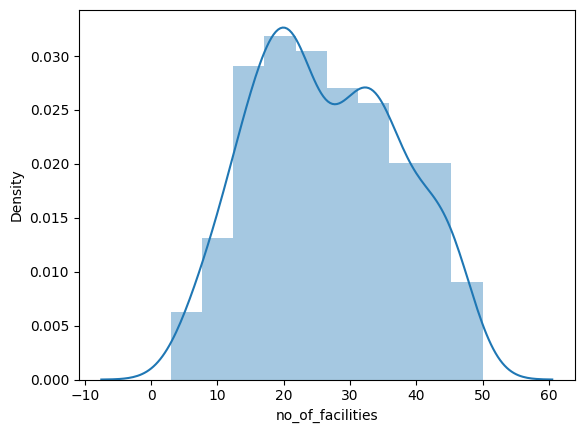

In [182]:
sns.distplot(df5s['no_of_facilities'])

In [183]:
df5s['hotel_name_'].iloc[:10]

46                                 Ranchotel Alabang
149                  OYO 841 Metro Deluxe Residences
101    OYO 474 Urbandeca Tower 316 - Nizami Condotel
21                 RedDoorz @ University Belt Manila
20                                 OYO 790 Mango Inn
27                                OYO 850 Clr Mn Inn
86                        OYO 794 Regatta Residences
174                     OYO 665 Pasay Centrale Hotel
250                    OYO 842 City Smiles Apartelle
300                       airobedz BGC - near Uptown
Name: hotel_name_, dtype: object

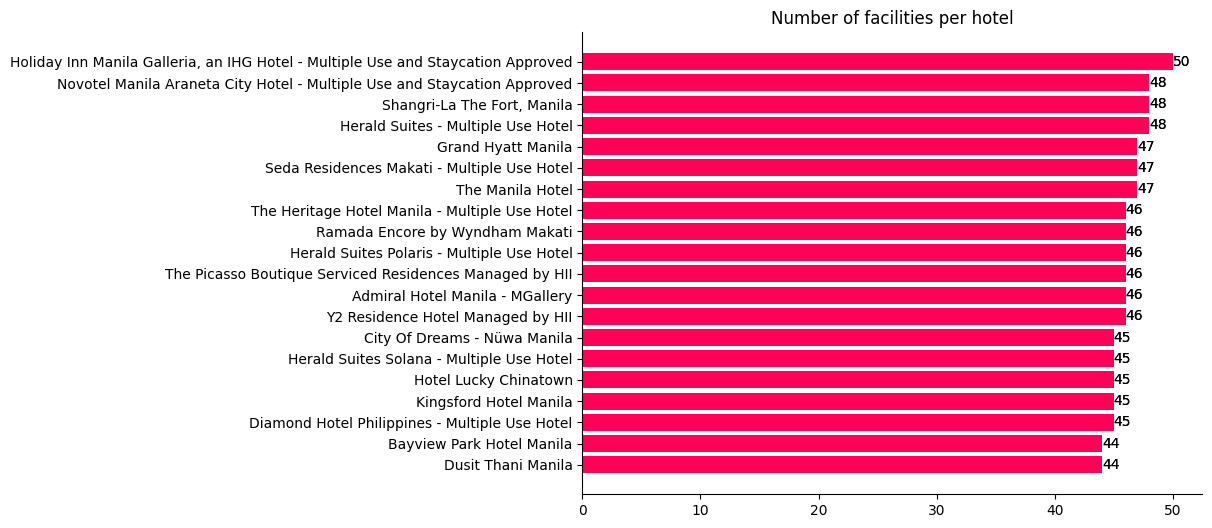

In [186]:
colors_l = ['#ff0257'] * 20

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(df5s['hotel_name_'].iloc[-20:], df5s['no_of_facilities'].iloc[-20:], color=colors_l)
ax.set_title('Number of facilities per hotel')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

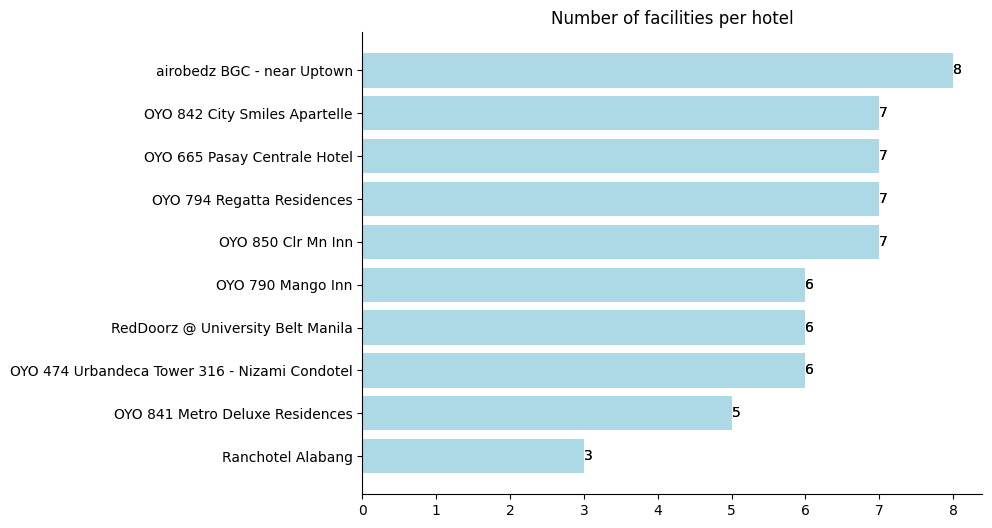

In [187]:
colors_l = ['lightblue'] * 20

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(df5s['hotel_name_'].iloc[:10], df5s['no_of_facilities'].iloc[:10], color=colors_l)
ax.set_title('Number of facilities per hotel')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

### Facilities Perspective

In [90]:
df5s = df5s.set_index('hotel_name_')

In [97]:
df5s

,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,smoke alarms,toilet,tv,24-hour security,towels,...,slippers,key access,accessible parking,facilities for disabled guests,wardrobe or closet,clothes rack,socket near the bed,bar,ironing service,no_of_facilities
hotel_name_,,,,,,,,,,,,,,,,,,,,,
Ranchotel Alabang,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
OYO 841 Metro Deluxe Residences,0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5
OYO 474 Urbandeca Tower 316 - Nizami Condotel,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
RedDoorz @ University Belt Manila,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
OYO 790 Mango Inn,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Grand Hyatt Manila,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,47
Herald Suites - Multiple Use Hotel,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,48
"Shangri-La The Fort, Manila",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,48


In [109]:
df5s = df5s.drop('no_of_facilities', axis=1)

In [189]:
df2 = df5s.T
df2.head()

,46,149,101,21,20,27,86,174,250,300,...,210,274,271,241,151,175,186,248,237,266
hotel_name_,Ranchotel Alabang,OYO 841 Metro Deluxe Residences,OYO 474 Urbandeca Tower 316 - Nizami Condotel,RedDoorz @ University Belt Manila,OYO 790 Mango Inn,OYO 850 Clr Mn Inn,OYO 794 Regatta Residences,OYO 665 Pasay Centrale Hotel,OYO 842 City Smiles Apartelle,airobedz BGC - near Uptown,...,Herald Suites Polaris - Multiple Use Hotel,Ramada Encore by Wyndham Makati,The Heritage Hotel Manila - Multiple Use Hotel,The Manila Hotel,Seda Residences Makati - Multiple Use Hotel,Grand Hyatt Manila,Herald Suites - Multiple Use Hotel,"Shangri-La The Fort, Manila",Novotel Manila Araneta City Hotel - Multiple U...,"Holiday Inn Manila Galleria, an IHG Hotel - Mu..."
air conditioning,1,0,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
non-smoking rooms,0,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
fire extinguishers,0,1,0,1,0,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
cctv in common areas,0,1,1,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [113]:
df2['freq_of_facilities'] = df2.sum(axis = 1)
df2['freq_of_facilities']

air conditioning                       302
non-smoking rooms                      281
fire extinguishers                     251
cctv in common areas                   285
private bathroom                       237
smoke alarms                           223
toilet                                 218
tv                                     217
24-hour security                       217
towels                                 216
free toiletries                        237
24-hour front desk                     242
shower                                 210
toilet paper                           236
airport shuttle                         81
elevator                               191
linens                                 189
security alarm                         185
flat-screen tv                         267
daily housekeeping                     183
cctv outside property                  261
room service                           161
designated smoking area                161
safe       

In [124]:
df2.index[:10]

Index(['air conditioning', 'non-smoking rooms', 'fire extinguishers',
       'cctv in common areas', 'private bathroom', 'smoke alarms', 'toilet',
       'tv', '24-hour security', 'towels'],
      dtype='object')

In [127]:
df2.sort_values(by=['freq_of_facilities'], inplace=True, ascending=True)
df2

hotel_name_,Ranchotel Alabang,OYO 841 Metro Deluxe Residences,OYO 474 Urbandeca Tower 316 - Nizami Condotel,RedDoorz @ University Belt Manila,OYO 790 Mango Inn,OYO 850 Clr Mn Inn,OYO 794 Regatta Residences,OYO 665 Pasay Centrale Hotel,OYO 842 City Smiles Apartelle,airobedz BGC - near Uptown,...,Ramada Encore by Wyndham Makati,The Heritage Hotel Manila - Multiple Use Hotel,The Manila Hotel,Seda Residences Makati - Multiple Use Hotel,Grand Hyatt Manila,Herald Suites - Multiple Use Hotel,"Shangri-La The Fort, Manila",Novotel Manila Araneta City Hotel - Multiple Use and Staycation Approved,"Holiday Inn Manila Galleria, an IHG Hotel - Multiple Use and Staycation Approved",freq_of_facilities
airport shuttle,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,81
ironing service,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,84
bar,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,85
socket near the bed,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,87
clothes rack,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,88
wardrobe or closet,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,93
facilities for disabled guests,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,93
accessible parking,0,0,0,0,1,1,0,0,1,0,...,1,1,1,1,1,0,1,1,1,94
key access,0,1,0,0,0,1,0,0,1,0,...,0,0,1,1,0,1,1,0,1,97
slippers,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,101


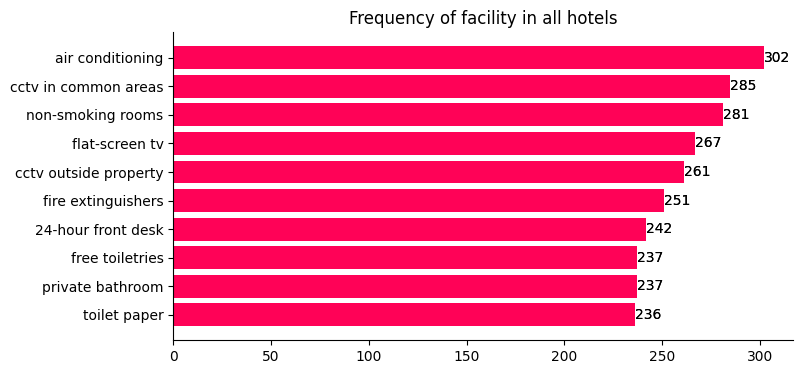

In [171]:
colors_l = ['#ff0257'] * 20

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df2.index[-10:], df2['freq_of_facilities'].iloc[-10:], color=colors_l)
ax.set_title('Frequency of facility in all hotels')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

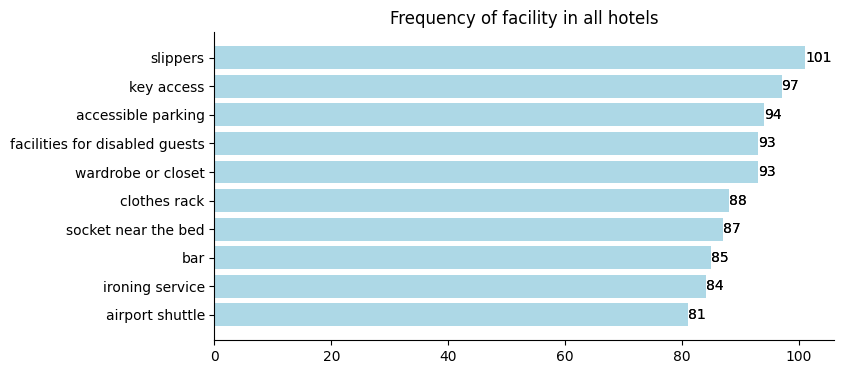

In [172]:
colors_l = ['lightblue'] * 20

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df2.index[:10], df2['freq_of_facilities'].iloc[:10], color=colors_l)
ax.set_title('Frequency of facility in all hotels')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

# Language Dataset

In [231]:
df3 = pd.read_csv("../data/languages.csv")
df3 = df3.drop(['Unnamed: 0', 'all_facilities', 'unlist', 'in_top_facilities'], axis=1)
df3

,hotel_name_,english,filipino,japanese,chinese,korean,farsi,arabic,german,spanish,french
0,RedDoorz near East Avenue Medical Center,1,1,0,0,0,0,0,0,0,0
1,Skylab Guesthouse,1,1,0,0,0,0,0,0,1,0
2,The Excelsior Hotel Las Piñas,1,0,0,0,0,0,0,0,1,0
3,Rothman Hotel,1,1,0,0,0,0,0,0,0,0
4,OYO 772 Remedios Apartment,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
302,RedDoorz at EDSA Pasay,1,0,0,0,0,0,0,0,0,0
303,Kabayan Hotel Pasay,1,1,0,0,0,0,0,0,0,0
304,"Crimson Hotel Filinvest City, Manila",1,1,0,0,0,0,0,0,0,0
305,RedDoorz @ Jardin LRT Tayuman Manila,1,1,0,0,0,0,0,0,0,0


In [222]:
#since at least one of the main philippine languages are spoken, we can 
df3[(df3['english'] == 0) & (df3['filipino'] == 0)]


,hotel_name_,english,filipino,japanese,chinese,korean,farsi,arabic,german,spanish,french


In [232]:
df3['total_languages'] = df3.sum(axis = 1)
df3


,hotel_name_,english,filipino,japanese,chinese,korean,farsi,arabic,german,spanish,french,total_languages
0,RedDoorz near East Avenue Medical Center,1,1,0,0,0,0,0,0,0,0,2
1,Skylab Guesthouse,1,1,0,0,0,0,0,0,1,0,3
2,The Excelsior Hotel Las Piñas,1,0,0,0,0,0,0,0,1,0,2
3,Rothman Hotel,1,1,0,0,0,0,0,0,0,0,2
4,OYO 772 Remedios Apartment,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
302,RedDoorz at EDSA Pasay,1,0,0,0,0,0,0,0,0,0,1
303,Kabayan Hotel Pasay,1,1,0,0,0,0,0,0,0,0,2
304,"Crimson Hotel Filinvest City, Manila",1,1,0,0,0,0,0,0,0,0,2
305,RedDoorz @ Jardin LRT Tayuman Manila,1,1,0,0,0,0,0,0,0,0,2


In [233]:
df3.sort_values(by=['total_languages'], inplace=True, ascending=True)
df3

,hotel_name_,english,filipino,japanese,chinese,korean,farsi,arabic,german,spanish,french,total_languages
151,Seda Residences Makati - Multiple Use Hotel,1,0,0,0,0,0,0,0,0,0,1
190,Arzo Hotel Makati,1,0,0,0,0,0,0,0,0,0,1
217,RedDoorz near Pasay Taft,1,0,0,0,0,0,0,0,0,0,1
274,Ramada Encore by Wyndham Makati,1,0,0,0,0,0,0,0,0,0,1
37,OYO 885 Gerlins Lodge Two,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
185,DG Grami Hotel,1,1,0,0,1,0,0,0,1,0,4
237,Novotel Manila Araneta City Hotel - Multiple U...,1,1,0,0,1,0,0,0,1,0,4
247,Manila Marriott Hotel,1,1,0,1,0,0,0,1,1,0,5
234,Solaire Resort & Casino - Staycation Approved,1,1,1,1,1,0,0,0,1,0,6


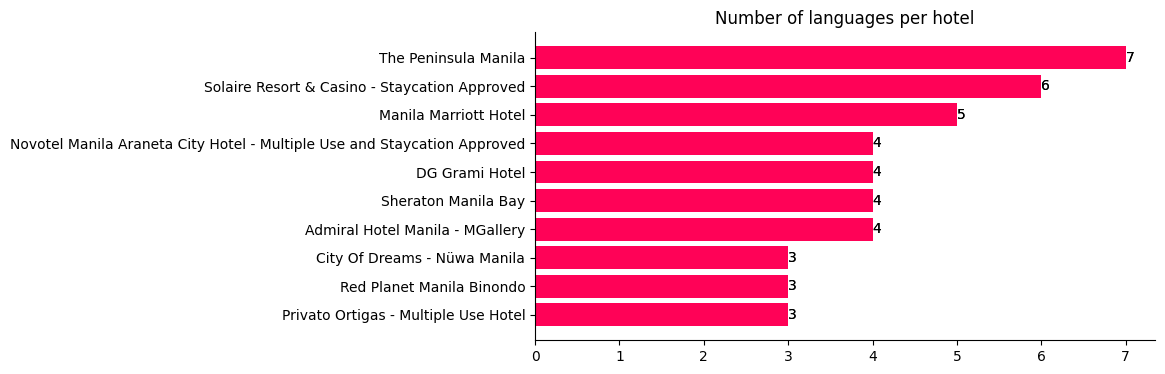

In [234]:
colors_l = ['#ff0257'] * 20

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df3['hotel_name_'].iloc[-10:], df3['total_languages'].iloc[-10:], color=colors_l)
ax.set_title('Number of languages per hotel')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

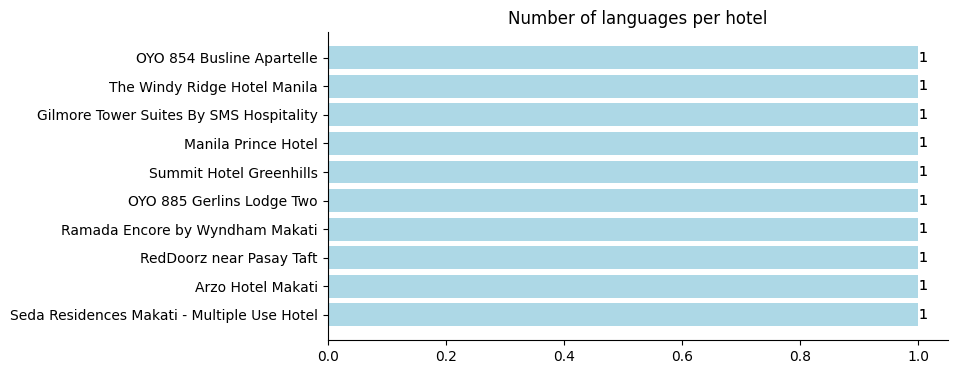

In [238]:
colors_l = ['lightblue'] * 20

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df3['hotel_name_'].iloc[:10], df3['total_languages'].iloc[:10], color=colors_l)
ax.set_title('Number of languages per hotel')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

In [239]:
df3 = df3.set_index('hotel_name_')

In [240]:
df3 = df3.T
df3

hotel_name_,Seda Residences Makati - Multiple Use Hotel,Arzo Hotel Makati,RedDoorz near Pasay Taft,Ramada Encore by Wyndham Makati,OYO 885 Gerlins Lodge Two,Summit Hotel Greenhills,Manila Prince Hotel,Gilmore Tower Suites By SMS Hospitality,The Windy Ridge Hotel Manila,OYO 854 Busline Apartelle,...,Privato Ortigas - Multiple Use Hotel,Red Planet Manila Binondo,City Of Dreams - Nüwa Manila,Admiral Hotel Manila - MGallery,Sheraton Manila Bay,DG Grami Hotel,Novotel Manila Araneta City Hotel - Multiple Use and Staycation Approved,Manila Marriott Hotel,Solaire Resort & Casino - Staycation Approved,The Peninsula Manila
english,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
filipino,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
japanese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
chinese,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,1
korean,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
farsi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
arabic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
german,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
spanish,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,1
french,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [241]:
df3['freq_of_languages'] = df3.sum(axis = 1)
df3.sort_values(by=['freq_of_languages'], inplace=True)
df3

hotel_name_,Seda Residences Makati - Multiple Use Hotel,Arzo Hotel Makati,RedDoorz near Pasay Taft,Ramada Encore by Wyndham Makati,OYO 885 Gerlins Lodge Two,Summit Hotel Greenhills,Manila Prince Hotel,Gilmore Tower Suites By SMS Hospitality,The Windy Ridge Hotel Manila,OYO 854 Busline Apartelle,...,Red Planet Manila Binondo,City Of Dreams - Nüwa Manila,Admiral Hotel Manila - MGallery,Sheraton Manila Bay,DG Grami Hotel,Novotel Manila Araneta City Hotel - Multiple Use and Staycation Approved,Manila Marriott Hotel,Solaire Resort & Casino - Staycation Approved,The Peninsula Manila,freq_of_languages
farsi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
arabic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
german,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2
korean,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,3
french,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,3
japanese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,6
chinese,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,1,1,12
spanish,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,42
filipino,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,241
english,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,303


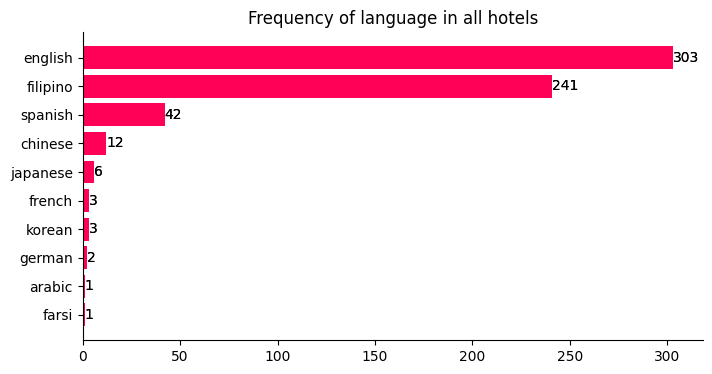

In [245]:
colors_l = ['#ff0257'] * 20

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df3.index[:10], df3['freq_of_languages'][:10], color=colors_l)
ax.set_title('Frequency of language in all hotels')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    ax.bar_label(ax.containers[0])
plt.show()

# Preprocessing

In [3]:
df["review_score"]=df["review_score"].apply(lambda x: float(x.strip()))
df["nights_stayed_"]=df["nights_stayed"].apply(lambda x: int(x.strip().split(" ")[0]))

month_map = {'January':1, 'February':2, 'March':3 , 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8 , 'September':9, 'October':10, 'November':11, 'December':12}

df['date_stayed']=df['month_stayed'].apply(lambda x: dt.datetime(int(x.strip().split(" ")[1]),month_map[x.strip().split(" ")[0]],1))
df['month_name'] = df['month_stayed'].apply(lambda x: x.strip().split(" ")[0])
df['month'] = df['month_name'].map(month_map)
df['year'] = df['month_stayed'].apply(lambda x: x.strip().split(" ")[1])


df['date_reviewed_']=df['date_reviewed'].apply(lambda x: dt.datetime(int(x.strip().split(" ")[1]),month_map[x.strip().split(" ")[0]],1))
df['month_name_reviewed'] = df['date_reviewed'].apply(lambda x: x.strip().split(" ")[0])
df['month_reviewed'] = df['month_name_reviewed'].map(month_map)
df['year_reviewed'] = df['date_reviewed'].apply(lambda x: x.strip().split(" ")[1])

